In [1]:
from ntaxon.fingerprinting.rflp import RestrictionDigestion
import pandas as pd
from Bio import Restriction, SeqIO

In [2]:
#enzyme=Restriction.MspI
enzyme=Restriction.AluI
print(enzyme.site)

AGCT


In [3]:
restriction = RestrictionDigestion(enzyme=enzyme, fasta="data/isolate_sequences_corrected.fasta")

In [4]:
matrix_bin = restriction.binary_matrix()
matrix_bin.to_df().head()

sample,MN493874.1,MN493875.1,MN493876.1,MN493877.1,MN493878.1,MN493879.1,MN493880.1,MN493881.1,MN493882.1,MN493883.1,...,MN577379.1,MN577380.1,MN577381.1,MN577382.1,MN577383.1,MN577384.1,MN577385.1,MN577386.1,MN577388.1,MN577389.1
haplotype,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(matrix_bin.to_df().columns)

72

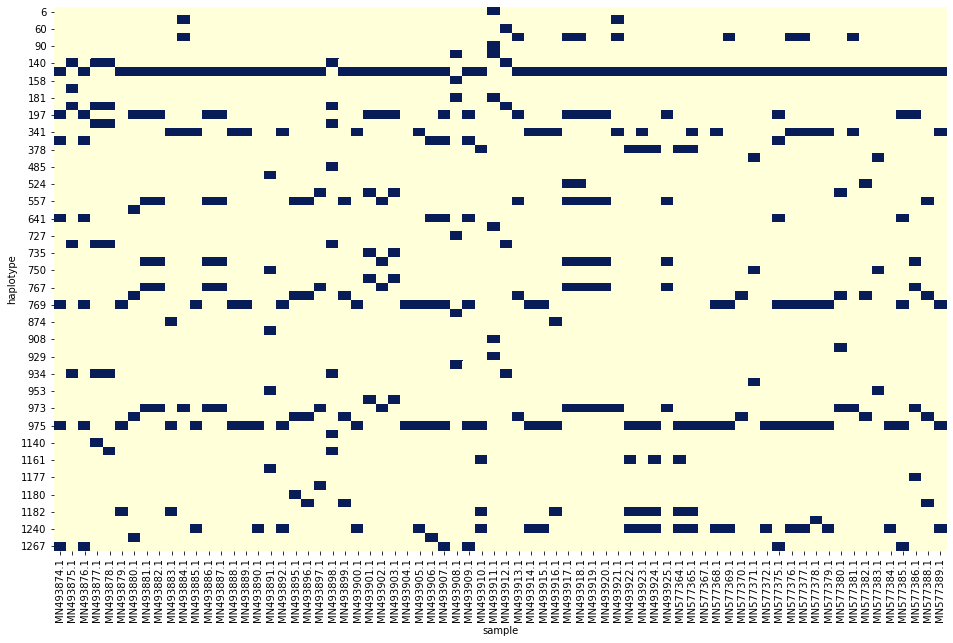

In [6]:
matrix_bin.plot_electrophoretic_diagram()

In [7]:
from ntaxon.phylogeny.neili import neili

In [8]:
# neili(matrix_bin.to_list(transpose=True), sitelength=4)

In [18]:
from ntaxon.phylogeny import DistanceMatrix
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo import draw
import numpy as np
from ntaxon.phylogeny.distance import squareform_to_dist

In [10]:
dist = matrix_bin.distance(squareform=True)

In [26]:
dm = squareform_to_dist(dist)
# print(dm)

In [19]:
constructor = DistanceTreeConstructor()

tree = constructor.upgma(dm)
#tree = constructor.nj(dm)

#print(tree)

#tree.ladderize()  # Flip branches so deeper clades are displayed at top
# draw(tree)



1

In [23]:
Phylo.draw_ascii(tree)

  _____________________________________ S12
 |
_|_____________________________________ S19
 |
 | ____________________________________ S25
 ||
 || ___________________________________ S30
  ||
  ||   ________________________________ S39
   |  |
   |__|      __________________________ S40
      |     |
      |     |     _____________________ S15
      |_____|    |
            |    |         _____________ S17
            |    |        |
            |____|      __|          ___ S61
                 |     |  |   ______|
                 |     |  |__|      |___ S50
                 |     |     |
                 |     |     |__________ S6
                 |_____|
                       |________________ S16
                       |
                       |             ________ S58
                       |        ____|
                       |       |    |     ___ S62
                       |       |    |____|
                       |       |         |___ S9
                       |       |
  

In [ ]:
Phylo.write(tree, "example-both.newick", "newick")

In [24]:
nw = "((S12:0.49523,(S19:0.49045,(S25:0.48091,(S30:0.46181,(S39:0.42362,(S40:0.34724,(S15:0.29007,((S17:0.17813,((S61:0.04545,S50:0.04545)Inner22:0.08947,S6:0.13492)Inner57:0.04320)Inner60:0.04157,(S16:0.21306,((S58:0.11458,(S62:0.05000,S9:0.05000)Inner34:0.06458)Inner54:0.06927,(((S60:0.04545,S45:0.04545)Inner23:0.10294,((S48:0.04545,S38:0.04545)Inner25:0.05722,S29:0.10268)Inner50:0.04571)Inner58:0.07678,((S63:0.05000,S13:0.05000)Inner33:0.10277,((S53:0.11280,((S47:0.04545,S27:0.04545)Inner26:0.04255,(S65:0.05625,(S32:0.04545,S21:0.04545)Inner28:0.01080)Inner38:0.03176)Inner46:0.05655)Inner52:0.01774,(((S55:0.05000,S8:0.05000)Inner35:0.04392,(S41:0.06059,(S22:0.03835,(S59:0.02500,(S66:0.00000,S2:0.00000)Inner7:0.02500)Inner12:0.01335)Inner17:0.02224)Inner40:0.03333)Inner47:0.06392,((((S49:0.04545,S44:0.04545)Inner24:0.04028,(S64:0.04545,S34:0.04545)Inner21:0.04028)Inner45:0.05545,(S54:0.05000,S7:0.05000)Inner36:0.05090)Inner49:0.06382,((S10:0.07769,(((S28:0.04460,(S51:0.04375,(S46:0.02639,((S71:0.00000,S36:0.00000)Inner2:0.01250,(S69:0.00000,S23:0.00000)Inner4:0.01250)Inner9:0.02639)Inner14:0.01736)Inner19:0.00085)Inner20:0.01599,(S57:0.04356,(S42:0.02500,(S68:0.00000,S5:0.00000)Inner5:0.02500)Inner13:0.01856)Inner18:0.01703)Inner39:0.02236,(S20:0.04545,S3:0.04545)Inner30:0.02151)Inner42:0.03224)Inner43:0.02585,(((S31:0.04545,S14:0.04545)Inner29:0.03329,(S56:0.05417,(S52:0.03312,(S43:0.02273,(S67:0.00000,S4:0.00000)Inner6:0.02273)Inner10:0.01039)Inner15:0.02105)Inner37:0.02458)Inner44:0.04411,(((S35:0.04545,S26:0.04545)Inner27:0.00288,(S24:0.03819,(((S72:0.00000,S37:0.00000)Inner1:0.01250,(S70:0.00000,S33:0.00000)Inner3:0.01250)Inner8:0.02386,S18:0.02386)Inner11:0.01433)Inner16:0.01014)Inner32:0.01584,(S11:0.04545,S1:0.04545)Inner31:0.01584)Inner41:0.05282)Inner48:0.04938)Inner51:0.03613)Inner53:0.04682)Inner55:0.05285)Inner56:0.03998)Inner59:0.06666)Inner61:0.07105)Inner62:0.09848)Inner63:0.00664)Inner64:0.07701)Inner65:0.05717)Inner66:0.07638)Inner67:0.03819)Inner68:0.01909)Inner69:0.00955)Inner70:0.00477)Inner71:0.00000);"

In [25]:
from ete3 import Tree, TreeStyle

t = Tree(nw)
#circular_style = TreeStyle()
#circular_style.mode = "c" # draw tree in circular mode
#circular_style.scale = 20

ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True

t.show(tree_style=ts)

NewickError: Unexpected newick format 'Inner22:0.08947' 
You may want to check other newick loading flags like 'format' or 'quoted_node_names'.